# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression

## 1. Data Cleaning

In [70]:
df = pd.read_csv('student_data.csv')

In [71]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [72]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2873,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0
1,3598,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0
2,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,6874,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0
4,6444,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [73]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 25 columns):
ID                            23999 non-null int64
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6               

In [75]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.columns=df.columns.str.lower()

In [76]:
df.groupby('education')['limit_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
0,11.0,235454.545455,86759.856658,50000.0,205000.0,230000.0,280000.0,360000.0
1,8442.0,213939.824686,135341.259115,10000.0,100000.0,200000.0,300000.0,1000000.0
2,11188.0,147620.307472,121132.176966,10000.0,50000.0,110000.0,210000.0,800000.0
3,3994.0,125369.974962,113349.121789,10000.0,50000.0,80000.0,180000.0,750000.0
4,100.0,220200.000000,110608.783694,20000.0,150000.0,200000.0,272500.0,710000.0
5,223.0,169264.573991,114070.773632,10000.0,80000.0,150000.0,230000.0,550000.0
6,41.0,168536.585366,137178.004352,10000.0,60000.0,150000.0,230000.0,540000.0


#### For Reference

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.  

Found this to only be slightly helpful. Not so much cleaning but more wrangling will be involved.

In [77]:
df['default'].value_counts()

0    18691
1     5308
Name: default, dtype: int64

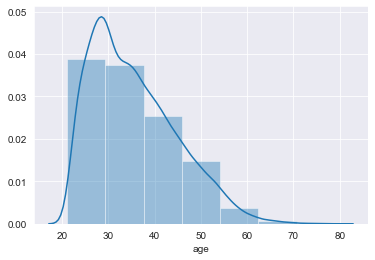

In [78]:
# Viewing the distribution of age in the data
sns.distplot(df['age'], bins = 7)

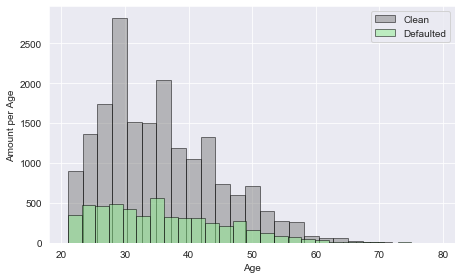

In [79]:
# Plotting total number 'clean' with the total number 'defaulted' over it
# There is a bit of a misalignment with the distribution
# Ages should be binned
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['default'] ==0].age, bins = 25, label ='Clean', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['default']==1].age, bins = 25, label = 'Defaulted', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_xlabel('Age')
ax1.set_ylabel('Amount per Age')
ax1.legend(loc = 'upper right')

This indicates to me I need to bin and categorize the ages to make dummies.

In [80]:
df['age_bin'] = pd.cut(df['age'], 6, labels=['20s', '30s', '40s', '50s', '60s', '70s'])
df[['age', 'age_bin']]
dums = pd.get_dummies(df['age_bin'], drop_first=True)
df.drop(columns=['age'], axis=1, inplace=True)

In [81]:
dums = pd.get_dummies(df['age_bin'], drop_first=True)
df = df.join(dums)

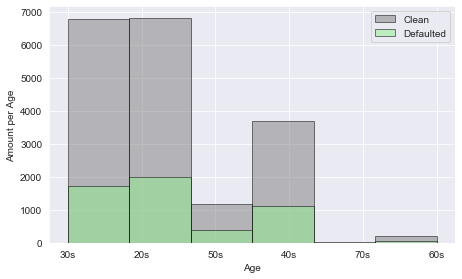

In [85]:
###### sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['default'] ==0].age_bin, bins = 6, label ='Clean', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['default']==1].age_bin, bins = 6, label = 'Defaulted', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_xlabel('Age')
ax1.set_ylabel('Amount per Age')
ax1.legend(loc = 'upper right')

In [86]:
df.drop(columns=['age_bin'], axis=1, inplace=True)

In [87]:
df.head()

,id,limit_bal,sex,education,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,30s,40s,50s,60s,70s
0,2873,350000,1,1,2,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,1,0,0,0,0
1,3598,50000,2,2,1,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,1,0,0,0,0
2,27623,50000,2,1,2,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,0,0,0,0,0
3,6874,20000,1,3,1,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,0,0,1,0,0
4,6444,110000,2,2,2,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,1,0,0,0,0


In [88]:
gender = []
for x in df['sex']:
    if x == 1:
        gender.append(1)
    elif x == 2:
        gender.append(0)

df['gender'] = gender

In [90]:
df.drop(columns=['sex'], axis=1, inplace=True)

In [93]:
df['edu'] = pd.cut(df['education'], 4, labels=['grad', 'undergrad', 'highschool', 'others'])
df[['edu', 'education']]
dums = pd.get_dummies(df['edu'], drop_first=True)
df.drop(columns=['education'], axis=1, inplace=True)

In [98]:
# df = df.join(dums)

In [99]:
df.drop(columns=['edu'], axis=1, inplace=True)

In [101]:
df.head()

,id,limit_bal,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,30s,40s,50s,60s,70s,gender,undergrad,highschool,others
0,2873,350000,2,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,1,0,0,0,0,1,0,0,0
1,3598,50000,1,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,1,0,0,0,0,0,1,0,0
2,27623,50000,2,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,0,0,0,0,0,0,0,0,0
3,6874,20000,1,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,0,0,1,0,0,1,1,0,0
4,6444,110000,2,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,1,0,0,0,0,0,1,0,0


In [102]:
df.drop(columns=['marriage'], axis=1, inplace=True)

In [110]:
df.drop(columns=['id'], axis=1, inplace=True)

In [103]:
df.head()

,id,limit_bal,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,30s,40s,50s,60s,70s,gender,undergrad,highschool,others
0,2873,350000,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,1,0,0,0,0,1,0,0,0
1,3598,50000,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,1,0,0,0,0,0,1,0,0
2,27623,50000,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,0,0,0,0,0,0,0,0,0
3,6874,20000,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,0,0,1,0,0,1,1,0,0
4,6444,110000,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,1,0,0,0,0,0,1,0,0


In [112]:
col_to_norm = ['limit_bal', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
              'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x: (x - x.min()) /(x.max() - x.min()), axis=0)

df.head()

,limit_bal,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,30s,40s,50s,60s,70s,gender,undergrad,highschool,others
0,0.343434,-2,-2,-2,-2,-2,-2,0.146799,0.064522,0.086518,0.160577,0.081110,0.261222,0.000362,0.000188,0.000520,0.000750,0.000741,0.000598,0,1,0,0,0,0,1,0,0,0
1,0.040404,2,2,2,0,0,0,0.182794,0.105682,0.107330,0.172408,0.093804,0.271351,0.006296,0.000000,0.000647,0.000966,0.001407,0.001135,0,1,0,0,0,0,0,1,0,0
2,0.040404,-1,-1,-1,-1,-1,-1,0.149554,0.066578,0.087607,0.164659,0.090375,0.261486,0.002917,0.001378,0.005357,0.015797,0.001547,0.005637,0,0,0,0,0,0,0,0,0,0
3,0.010101,0,0,0,0,2,0,0.156118,0.075801,0.093418,0.173122,0.093955,0.271496,0.001726,0.000722,0.001245,0.000000,0.001149,0.001245,0,0,0,1,0,0,1,1,0,0
4,0.101010,0,0,0,0,0,0,0.242227,0.165806,0.145896,0.262653,0.190273,0.342501,0.006182,0.003206,0.004576,0.006602,0.009612,0.007945,0,1,0,0,0,0,0,1,0,0


If pay_x is less than or equal to 0, make it 0  
If pay_x is greater than 0, make it 1  
See what happens

In [119]:
df.loc[df.pay_0 <= 0, 'pay_0'] = 0
df.loc[df.pay_0 > 0, 'pay_0'] = 1
df.loc[df.pay_2 <= 0, 'pay_2'] = 0
df.loc[df.pay_2 > 0, 'pay_2'] = 1
df.loc[df.pay_3 <= 0, 'pay_3'] = 0
df.loc[df.pay_3 > 0, 'pay_3'] = 1
df.loc[df.pay_4 <= 0, 'pay_4'] = 0
df.loc[df.pay_4 > 0, 'pay_4'] = 1
df.loc[df.pay_5 <= 0, 'pay_5'] = 0
df.loc[df.pay_5 > 0, 'pay_5'] = 1
df.loc[df.pay_6 <= 0, 'pay_6'] = 0
df.loc[df.pay_6 > 0, 'pay_6'] = 1

In [120]:
df.head()

,limit_bal,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,30s,40s,50s,60s,70s,gender,undergrad,highschool,others
0,0.343434,0,0,0,0,0,0,0.146799,0.064522,0.086518,0.160577,0.081110,0.261222,0.000362,0.000188,0.000520,0.000750,0.000741,0.000598,0,1,0,0,0,0,1,0,0,0
1,0.040404,0,1,1,0,0,0,0.182794,0.105682,0.107330,0.172408,0.093804,0.271351,0.006296,0.000000,0.000647,0.000966,0.001407,0.001135,0,1,0,0,0,0,0,1,0,0
2,0.040404,0,0,0,0,0,0,0.149554,0.066578,0.087607,0.164659,0.090375,0.261486,0.002917,0.001378,0.005357,0.015797,0.001547,0.005637,0,0,0,0,0,0,0,0,0,0
3,0.010101,0,0,0,0,1,0,0.156118,0.075801,0.093418,0.173122,0.093955,0.271496,0.001726,0.000722,0.001245,0.000000,0.001149,0.001245,0,0,0,1,0,0,1,1,0,0
4,0.101010,0,0,0,0,0,0,0.242227,0.165806,0.145896,0.262653,0.190273,0.342501,0.006182,0.003206,0.004576,0.006602,0.009612,0.007945,0,1,0,0,0,0,0,1,0,0


## At this point the data is cleaned and wrangled down to a 0 and 1 matrix
### All below work has become irrelevant :/

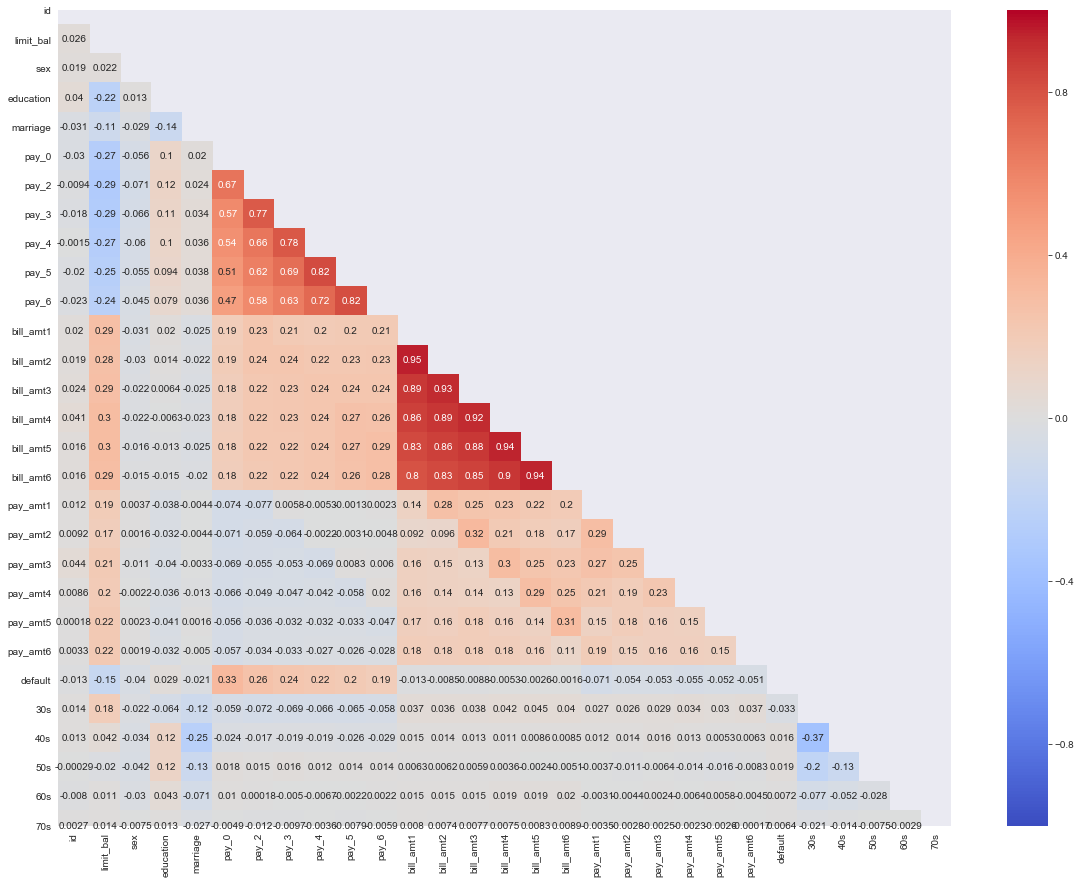

In [46]:
# Looking for multicollinearity
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

I think the BILL_AMT and PAY_x are showing hi multicollinearity. It might be worth to see how to combine. Based on this plot I don't think certain features are likely to make a difference in the default rate. Also, a higher LIMIT_BAL is associated with a lower chance of defaulting.  
This is an example of Business Intelliegence or Business Understanding.

<img src="files/heatmatrix2.png">  
I am going to drop `marriage` I don't see much if any effect on my target. It is also running into some multicollinearity interactions with some of the age variables.

In [47]:
df.drop(columns=['marriage'], axis=1, inplace=True)

In [49]:
df.drop(columns=['id'], axis=1, inplace=True)

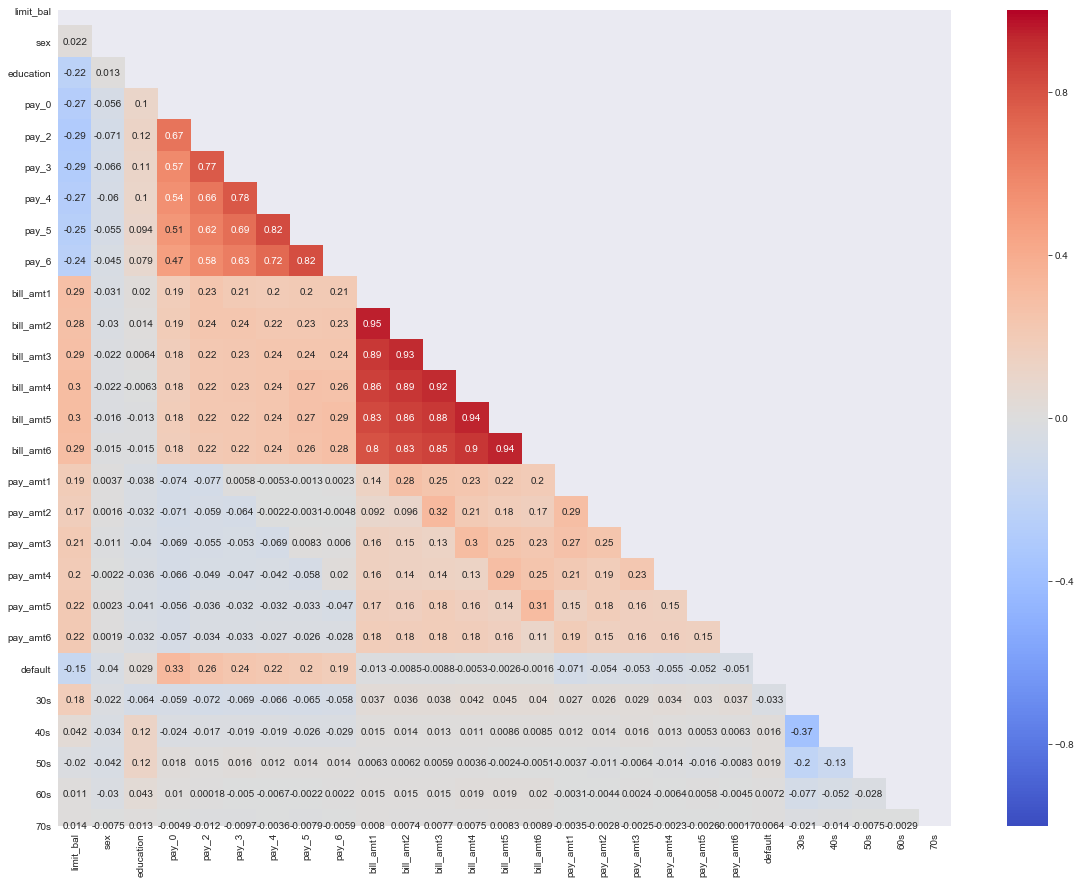

In [50]:
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

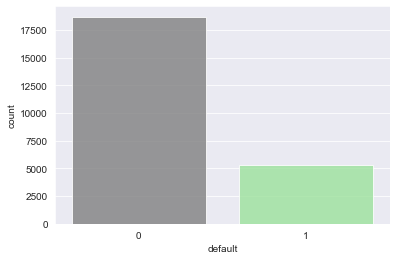

In [67]:
sns.countplot(df['default'], alpha =.80, palette= ['grey','lightgreen'])

In [69]:
df['default'].value_counts()

0    18691
1     5308
Name: default, dtype: int64

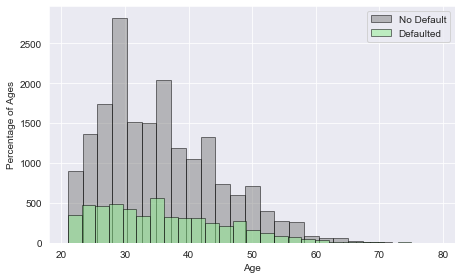

In [75]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['default payment next month'] ==0].AGE, bins = 25, label ='No Default', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['default payment next month']==1].AGE, bins = 25, label = 'Defaulted', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_xlabel('Age')
ax1.set_ylabel('Percentage of Ages')
ax1.legend(loc = 'upper right')

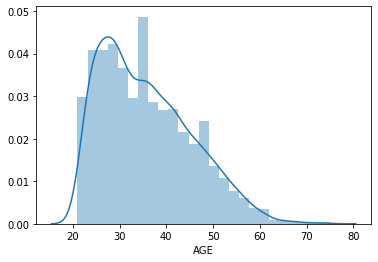

In [74]:
sns.distplot(df[df['default payment next month']==1].AGE, bins = 25, label = 'Default')

## 2. EDA

In [83]:
df['PAY_SUM'] = df.apply(lambda row: row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5 + row.PAY_6, axis=1)

In [93]:
df['PAY_MEAN'] = df.apply(lambda row: (row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5 + row.PAY_6)/6, axis=1)

In [101]:
df['DEBT'] = df.apply(lambda row: ((row.BILL_AMT6-row.PAY_AMT5) + (row.BILL_AMT5-row.PAY_AMT4) + (row.BILL_AMT4-row.PAY_AMT3)
                                   + (row.BILL_AMT3-row.PAY_AMT2) + (row.BILL_AMT2-row.PAY_AMT1) + row.BILL_AMT1), axis=1)

In [103]:
df['DEBT_P'] = df['DEBT']/df['LIMIT_BAL']

In [104]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_SUM,PAY_MEAN,DEBT,DEBT_P
0,2873,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,-12,-2.000000,316.0,0.000903
1,3598,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,6,1.000000,155321.0,3.106420
2,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,-6,-1.000000,3338.0,0.066760
3,6874,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,2,0.333333,72467.0,3.623350
4,6444,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,0,0.000000,625803.0,5.689118


In [86]:
# Is the PAY_SUM related to the default rate in any way?
df.groupby('default payment next month')['PAY_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,18691.0,-1.966936,5.023485,-12.0,-5.0,0.0,0.0,33.0
1,5308.0,2.044461,7.433462,-12.0,-2.0,2.0,7.0,36.0


In [116]:
# I think this will ask for some sort of comparison test
# I will see if the means are statisically different
# If they are, it may be that an average PAY score is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['PAY_SUM'],
                         df.loc[lambda df: df['default payment next month'] == 1]['PAY_SUM'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


In [99]:
# How about the average PAY_MEAN to default rate?
df.groupby('default payment next month')['PAY_MEAN'].describe()

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,18691.0,-0.327823,0.837247,-2.0,-0.833333,0.000000,0.000000,5.5
1,5308.0,0.340744,1.238910,-2.0,-0.333333,0.333333,1.166667,6.0


In [117]:
# If they are, it may be that an average PAY MEAN is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['PAY_MEAN'],
                         df.loc[lambda df: df['default payment next month'] == 1]['PAY_MEAN'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


In [105]:
# How about DEBT PERCENTAGE to default rate?
df.groupby('default payment next month')['DEBT_P'].describe()

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,18691.0,1.909579,2.003999,-7.430924,0.040932,1.185467,3.62394,31.32135
1,5308.0,2.531793,2.142431,-3.645633,0.090311,2.565213,4.52221,15.38734


In [118]:
# I think this will ask for some sort of comparison test
# I will see if the means are statisically different
# If they are, it may be that an average PAY score is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['DEBT_P'],
                         df.loc[lambda df: df['default payment next month'] == 1]['DEBT_P'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


If `debt percentage` isn't different amongst the groups of default vs non default it makes no sense in comparing the two groups based on this metric. If there was a different then we could say that maybe if people have a high debt percentage the risk of default is higher but it makes sense that people may put a large purchase on a card to pay it off over time.  

However, how about `debt percentage` interaction with the pay score?


## 3. Feature Engineering

In [142]:
# Make a falling behind payments column using PAY_0
# PAY_0 is the most recent PAY rating meaning how far behind or ahead an individual is
# PAY_0 also has the highest correlation with 'default'

df2 = df


# df['PAY_STATUS'] = [x if (df.apply(lambda row: row.PAY_0 + row.PAY_2, axis=1)) <= 1 x = 0 elif (df.apply(lambda row: row.PAY_0 + row.PAY_2, axis=1)) > 1]

In [143]:
df2.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pay_sum,pay_mean,debt,debt_p
0,2873,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,-12,-2.000000,316.0,0.000903
1,3598,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,6,1.000000,155321.0,3.106420
2,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,-6,-1.000000,3338.0,0.066760
3,6874,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,2,0.333333,72467.0,3.623350
4,6444,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,0,0.000000,625803.0,5.689118


In [152]:
col_dums = ['sex', 'education', 'marriage']
df2.drop(columns=['sex', 'education', 'marriage'])
# Accessing the column values from the original DF
# Won't run into issues
col_dums = pd.get_dummies(df[col_dums], drop_first=True)
col_dums
# df_dum = pd.concat([df2, col_dums], axis=1)
# df_dum

,sex,education,marriage
0,1,1,2
1,2,2,1
2,2,1,2
3,1,3,1
4,2,2,2
...,...,...,...
23994,2,1,2
23995,1,3,1
23996,1,3,2
23997,2,2,1


## 4. Feature Selection

In [126]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pay_sum,pay_mean,debt,debt_p
0,2873,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0,-12,-2.000000,316.0,0.000903
1,3598,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,6,1.000000,155321.0,3.106420
2,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,-6,-1.000000,3338.0,0.066760
3,6874,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,2,0.333333,72467.0,3.623350
4,6444,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,0,0.000000,625803.0,5.689118


## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

Going to make a model based on the features I have now  
Then I will be removing some features by hand  
Then I will remove via Feature Selection Methods  
Then I will start to test out other methods  

In [138]:
X = df.drop(columns=['id', 'default'], axis=1)
y = df.default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [139]:
X.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pay_sum,pay_mean,debt,debt_p
0,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,-12,-2.000000,316.0,0.000903
1,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,6,1.000000,155321.0,3.106420
2,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,-6,-1.000000,3338.0,0.066760
3,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,2,0.333333,72467.0,3.623350
4,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,0.000000,625803.0,5.689118


In [128]:
# Fitting a baseline LogReg model
logreg = LogisticRegression(C=1e14, solver='lbfgs', fit_intercept=False)
model_1 = logreg.fit(X_train, y_train, )
dictionary = dict(zip(list(X_train.columns), list(model_1.coef_[0])))

## 6. Model Evaluation

## 7. Final Model